## Real Micro Crystals -  Data Engineering & Exploration

Michael Janus, June 2018

last update: October 2018

Use the functions on a real (small) data set.

For explanation and how to usage functions, see the notebook **imgutils_test_and_explain.ipynb**

## 1. Import the used modules, including the one with test functions:

In [246]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import matplotlib.pyplot as plt
import pandas as pd

import imgutils

In [247]:
# Re-run this cell if you altered imgutils or imgutils_test
import importlib
importlib.reload(imgutils)

<module 'imgutils' from 'C:\\JADS\\SW\\Grad Proj\\sources\\imgutils.py'>

## 1. Get image files

In [87]:
df_imgfiles = imgutils.scanimgdir('../data/Crystals_Apr_12/Tileset7', '.tif')
print(df_imgfiles)

                                            filename
0  ..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...
1  ..\data\Crystals_Apr_12\Tileset7\Tile_001-002-...
2  ..\data\Crystals_Apr_12\Tileset7\Tile_001-003-...
3  ..\data\Crystals_Apr_12\Tileset7\Tile_002-001-...
4  ..\data\Crystals_Apr_12\Tileset7\Tile_002-002-...
5  ..\data\Crystals_Apr_12\Tileset7\Tile_002-003-...


## 2. Get Image Slice Statistics
This set contains 6 images. Let's slice those up in 4 by 4; this will give total of 6 x 4 x 4 = 96 slices.
And also apply the statistics on each slice.

In [4]:
statfuncs = [imgutils.img_min, imgutils.img_max, imgutils.img_range, imgutils.img_mean, imgutils.img_std, imgutils.img_median]
df = imgutils.slicestats(list(df_imgfiles['filename']), 4, 4, statfuncs)
print("records: ", df.shape[0])
df.head()

records:  96


filename  s_y  s_x  n_y  n_x  \
0  ..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...    0    0    4    4   
1  ..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...    0    1    4    4   
2  ..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...    0    2    4    4   
3  ..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...    0    3    4    4   
4  ..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...    1    0    4    4   

      alias  img_min  img_max  img_range     img_mean     img_std  img_median  
0  img0_0-0   5419.0  12927.0     7508.0  8955.557637  489.754848      8960.0  
1  img0_0-1   5248.0  12854.0     7606.0  8883.137305  501.739963      8893.0  
2  img0_0-2   6084.0  10737.0     4653.0  8786.996070  327.512136      8786.0  
3  img0_0-3   7105.0  12208.0     5103.0  8679.430512  273.673569      8679.0  
4  img0_1-0   4534.0  10926.0     6392.0  8982.867158  380.410977      8980.0

**Normalize** the statistics using 'standarization'

In [5]:
stat_names = imgutils.stat_names(statfuncs)
print(stat_names)

['img_min', 'img_max', 'img_range', 'img_mean', 'img_std', 'img_median']


In [6]:
df.isnull().values.any()

False

In [7]:
imgutils.normalize(df, stat_names)
df.head()

filename  s_y  s_x  n_y  n_x  \
0  ..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...    0    0    4    4   
1  ..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...    0    1    4    4   
2  ..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...    0    2    4    4   
3  ..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...    0    3    4    4   
4  ..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...    1    0    4    4   

      alias  img_min  img_max  img_range     img_mean     img_std  img_median  \
0  img0_0-0   5419.0  12927.0     7508.0  8955.557637  489.754848      8960.0   
1  img0_0-1   5248.0  12854.0     7606.0  8883.137305  501.739963      8893.0   
2  img0_0-2   6084.0  10737.0     4653.0  8786.996070  327.512136      8786.0   
3  img0_0-3   7105.0  12208.0     5103.0  8679.430512  273.673569      8679.0   
4  img0_1-0   4534.0  10926.0     6392.0  8982.867158  380.410977      8980.0   

   |img_min|  |img_max|  |img_range|  |img_mean|  |img_std|  |img_median|  
0   0.272467   0.099593    -0.110160    0.615795  -0.100998      0.524018  
1   0.208221   0.071800    -0.086875    0.289248  -0.079451      0.180861  
2   0.522312  -0.734208    -0.788528   -0.144258  -0.392677     -0.367165  
3   0.905910  -0.174153    -0.681605   -0.629277  -0.489467     -0.915190  
4  -0.060035  -0.662250    -0.375329    0.738935  -0.297575      0.626452

In [8]:
stat_normnames = imgutils.normalized_names(stat_names)
print(stat_normnames)

['|img_min|', '|img_max|', '|img_range|', '|img_mean|', '|img_std|', '|img_median|']


## 3. Check some combinations for patterns
(using the seaborn pairplot)

In [9]:
import seaborn as sb

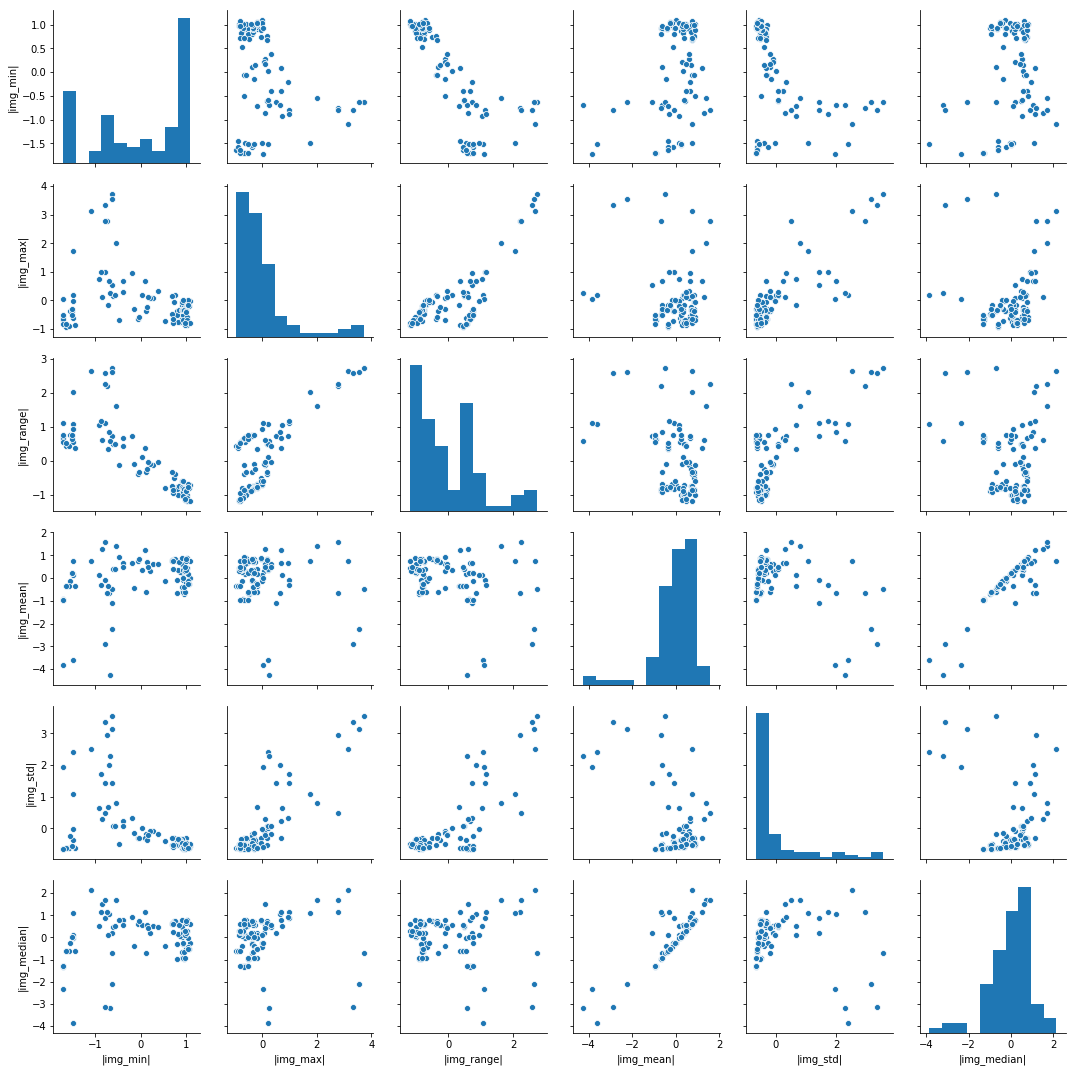

In [10]:
%matplotlib inline
sb.pairplot(df, vars=stat_normnames)
plt.show()

## 4. Inspect interactively
Let's inspect some combinations that have 'signs of clustering' in the interactive graph

In [261]:
%matplotlib notebook

<IPython.core.display.Javascript object>


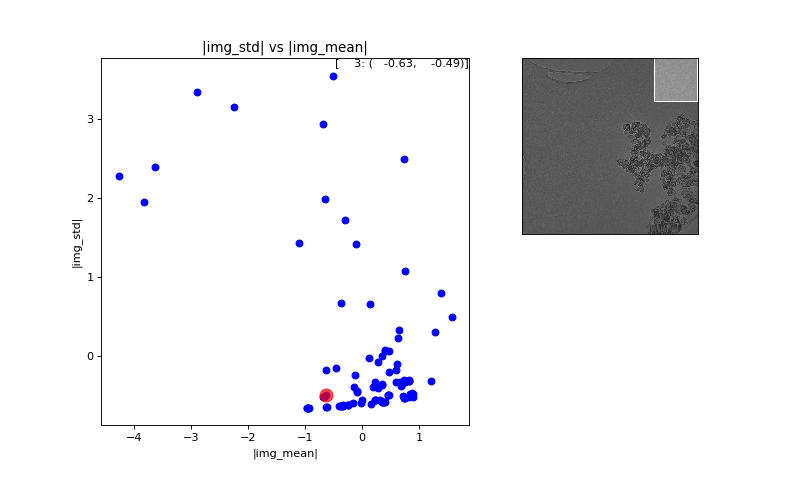

In [266]:
imgutils.plotwithimg(df, '|img_mean|', '|img_std|', imgutils.highlightimgslice)

<IPython.core.display.Javascript object>


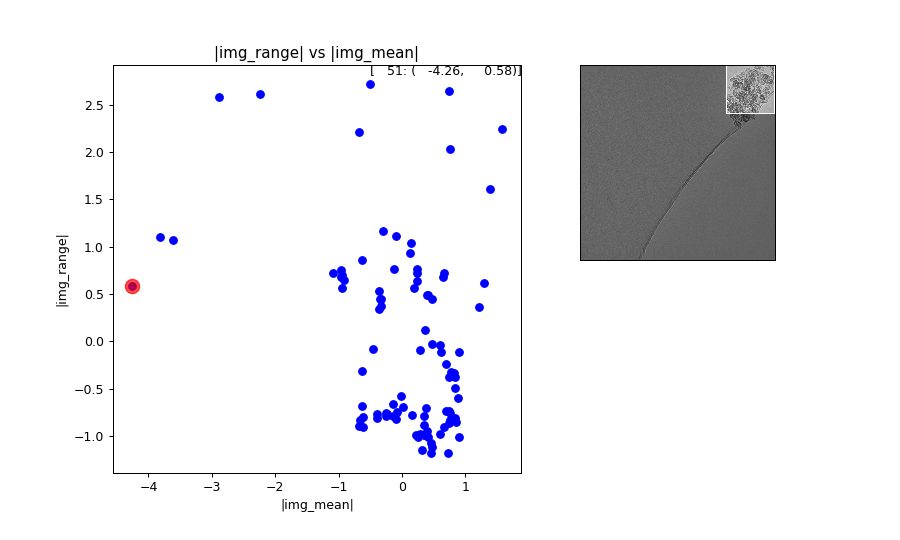

In [262]:
imgutils.plotwithimg(df, '|img_mean|', '|img_range|', imgutils.highlightimgslice)

Looks likt the sort-of cluster in lower right are points without a crystal

<IPython.core.display.Javascript object>


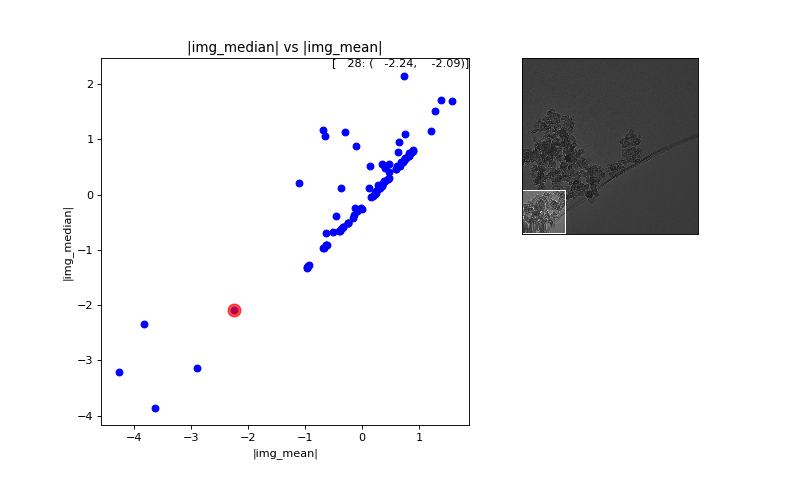

In [269]:
imgutils.plotwithimg(df, '|img_mean|', '|img_median|', imgutils.highlightimgslice)

The separation is not representative, the group at top-left contains both with and without micro crystals

<IPython.core.display.Javascript object>


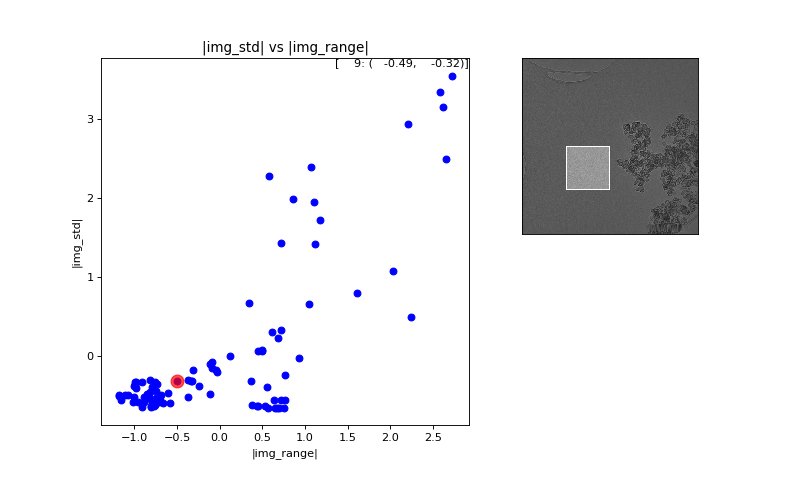

In [270]:
imgutils.plotwithimg(df, '|img_range|', '|img_std|', imgutils.highlightimgslice)

This looks better, bottom left are empty regions, top-left have crystals. 

## 5. Heatmaps

Let's do an attempt to create a score for a heatmap. Looks like |img_std| is most infromative

In [15]:
df['dummy']=0

In [16]:
imgname = df_imgfiles.iloc[3]['filename']
print(imgname)

..\data\Crystals_Apr_12\Tileset7\Tile_002-001-000_0-000.tif


In [17]:
imgs, heats = imgutils.getimgslices_fromdf(df, imgname, '|img_std|')

In [18]:
%matplotlib inline

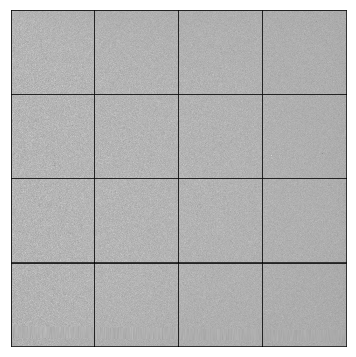

[[-0.5007574  -0.55362623 -0.60028822 -0.64122158]
 [-0.48290759 -0.53099997 -0.57905287 -0.63107007]
 [-0.47531551 -0.52509339 -0.58101869 -0.63091528]
 [-0.49651996 -0.55462781 -0.61553092 -0.6530468 ]]


In [237]:
imgutils.showheatmap(imgs, heats)
print(heats)

Yes, looks great!. Let's check for some other images as well

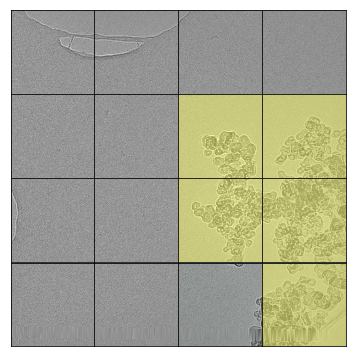

[[-0.10099756 -0.07945079 -0.39267662 -0.4894673 ]
 [-0.29757537 -0.3273344   1.4246215   1.43493234]
 [-0.18030138 -0.32036146  1.99383811  2.39706397]
 [-0.32505447 -0.38569278  0.06486636  1.95016713]]


In [238]:
imgname = df_imgfiles.iloc[0]['filename']
imgs, heats = imgutils.getimgslices_fromdf(df, imgname, '|img_std|')
imgutils.showheatmap(imgs, heats, opacity=0.5)
print(heats)

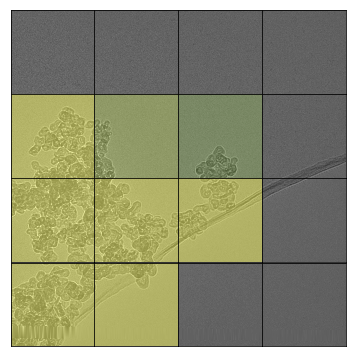

[[-0.30616301 -0.3702352  -0.44774946 -0.51603165]
 [ 2.50175087  0.80320234  0.65300243 -0.180137  ]
 [ 3.55004565  2.94066527  1.71852491 -0.2448691 ]
 [ 3.1514378   1.07195892 -0.5602243  -0.65242612]]


In [239]:
imgname = df_imgfiles.iloc[1]['filename']
imgs, heats = imgutils.getimgslices_fromdf(df, imgname, '|img_std|')
imgutils.showheatmap(imgs, heats, opacity=0.5)
print(heats)

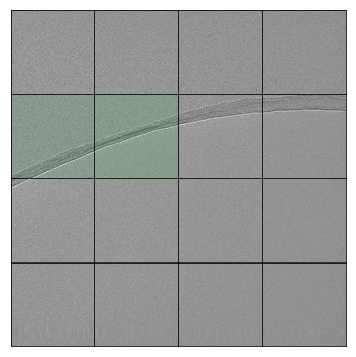

[[-3.25663596e-01 -3.98403099e-01 -4.54799075e-01 -5.20120403e-01]
 [ 2.32004465e-01  3.33913520e-01 -4.85345650e-04 -1.48112655e-01]
 [-3.12944453e-01 -5.22354114e-01 -5.79775101e-01 -6.29787851e-01]
 [-4.94901820e-01 -5.52180410e-01 -6.15687209e-01 -6.54574240e-01]]


In [240]:
imgname = df_imgfiles.iloc[2]['filename']
imgs, heats = imgutils.getimgslices_fromdf(df, imgname, '|img_std|')
imgutils.showheatmap(imgs, heats, opacity=0.7)
print(heats)

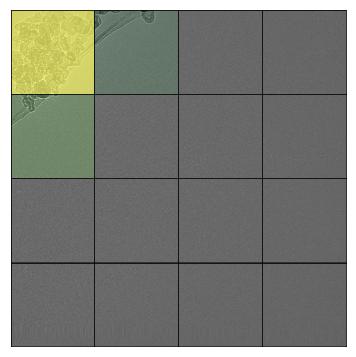

[[ 3.34714189  0.30222308 -0.60226899 -0.64055911]
 [ 0.49391915 -0.52329529 -0.57912635 -0.62971287]
 [-0.47261207 -0.52582949 -0.579462   -0.63034999]
 [-0.49885962 -0.55231449 -0.61765429 -0.65437469]]


In [241]:
imgname = df_imgfiles.iloc[4]['filename']
imgs, heats = imgutils.getimgslices_fromdf(df, imgname, '|img_std|')
imgutils.showheatmap(imgs, heats, opacity=0.7)
print(heats)

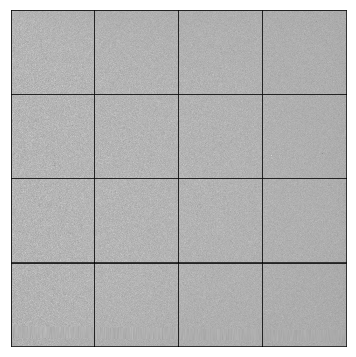

[[-0.5007574  -0.55362623 -0.60028822 -0.64122158]
 [-0.48290759 -0.53099997 -0.57905287 -0.63107007]
 [-0.47531551 -0.52509339 -0.58101869 -0.63091528]
 [-0.49651996 -0.55462781 -0.61553092 -0.6530468 ]]


In [242]:
imgname = df_imgfiles.iloc[5]['filename']
imgs, heats = imgutils.getimgslices_fromdf(df, imgname, '|img_std|')
imgutils.showheatmap(imgs, heats, opacity=0.7)
print(heats)

## 6. Conclusions & Remarks
- The visualization and heatmap concept looks nice. 
- Did not use real clustering, but from data exploration just used normalized standard deviation as indicator
- For larger or different sets (with outliers), I guess a combination of statistics is needed (which was the idea in the first place and let ML figure out what)


## 7. Next steps
- Export this data set and label it based on std-dev (e.g. 3 cats: none, some, full) 
- Export this data set for unsupervised learning
- Repeat on bigger and more versatile set



Michael Janus, 15 June 2018

<hr>


# Update 5 July 2018
## 8. Assign labels
inspecting the heats, define 3 cats: 
* |img_std|<0 = A (no particle);
* 0<|img_std|<1 = B (partly)
* |img_std|>1 = C (fully)


In [25]:
def assign_label(score):
    if score<0: return 'A'
    if score>=1: return 'C'
    return 'B'

df['class'] = df.apply(lambda r: assign_label(r['|img_std|']), axis=1)

In [26]:
df.head()

filename  s_y  s_x  n_y  n_x  \
0  ..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...    0    0    4    4   
1  ..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...    0    1    4    4   
2  ..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...    0    2    4    4   
3  ..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...    0    3    4    4   
4  ..\data\Crystals_Apr_12\Tileset7\Tile_001-001-...    1    0    4    4   

      alias  img_min  img_max  img_range     img_mean     img_std  img_median  \
0  img0_0-0   5419.0  12927.0     7508.0  8955.557637  489.754848      8960.0   
1  img0_0-1   5248.0  12854.0     7606.0  8883.137305  501.739963      8893.0   
2  img0_0-2   6084.0  10737.0     4653.0  8786.996070  327.512136      8786.0   
3  img0_0-3   7105.0  12208.0     5103.0  8679.430512  273.673569      8679.0   
4  img0_1-0   4534.0  10926.0     6392.0  8982.867158  380.410977      8980.0   

   |img_min|  |img_max|  |img_range|  |img_mean|  |img_std|  |img_median|  \
0   0.272467   0.099593    -0.110160    0.615795  -0.100998      0.524018   
1   0.208221   0.071800    -0.086875    0.289248  -0.079451      0.180861   
2   0.522312  -0.734208    -0.788528   -0.144258  -0.392677     -0.367165   
3   0.905910  -0.174153    -0.681605   -0.629277  -0.489467     -0.915190   
4  -0.060035  -0.662250    -0.375329    0.738935  -0.297575      0.626452   

   dummy class  
0      0     A  
1      0     A  
2      0     A  
3      0     A  
4      0     A

In [27]:
df2 = df[df['class']=='C']

In [28]:
print(len(df2))

13


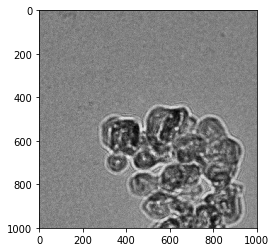

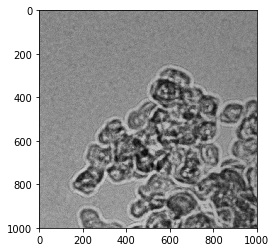

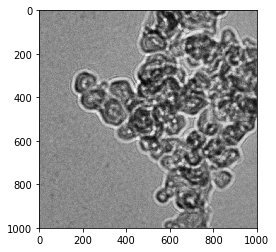

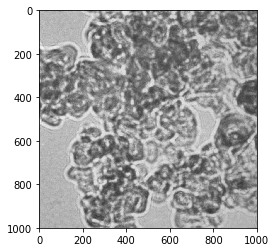

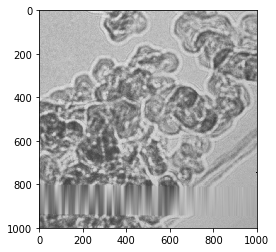

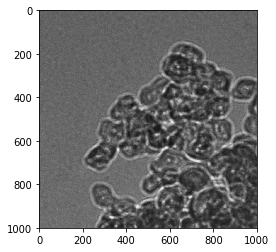

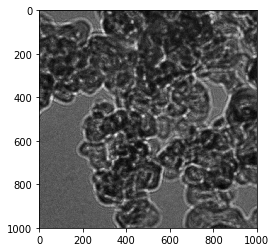

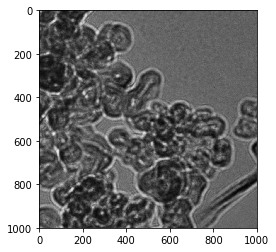

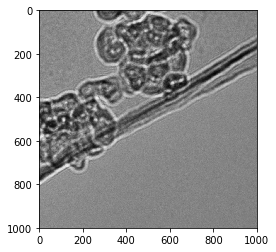

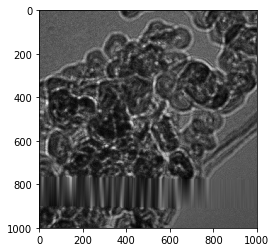

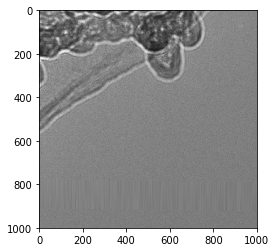

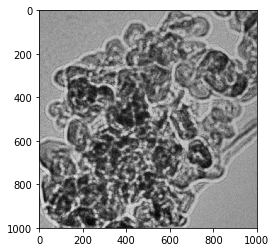

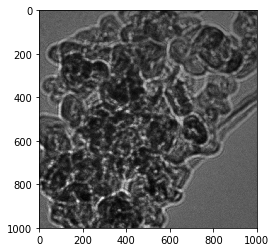

In [29]:
%matplotlib inline
# check class C images
for i in range(0,len(df2)):
    img = imgutils.getimgslice(df2, i)
    imgutils.showimg(img)

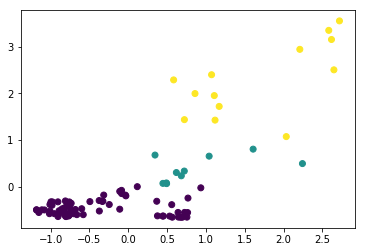

In [30]:
# also plot them the img_std vs img_range with the labels
labels = df['class'].tolist()
colors = [(0 if (l=='A') else (1 if (l=='B') else 2))  for l in labels]
plt.scatter(df['|img_range|'], df['|img_std|'], c=colors)
plt.show()

ideally we should have this interactive with the images, so extend the infrastructure
(done, had to change to interactive scatter plot instead of line plot)

<IPython.core.display.Javascript object>


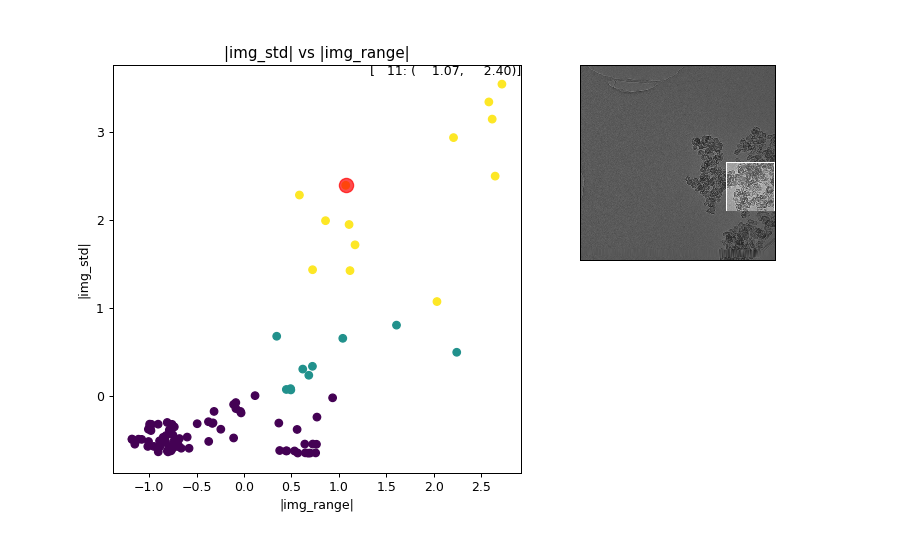

In [265]:
%matplotlib notebook
imgutils.plotwithimg(df, '|img_range|', '|img_std|', imgutils.highlightimgslice, 'class')


## 9. Export as csv


In [32]:
df.to_csv('../data/Crystals_Apr_12/Tileset7.csv', sep=';')

## 10. Also other stats

In [33]:
statfuncs = [imgutils.img_mean, imgutils.img_std, imgutils.img_kurtosis, imgutils.img_skewness, imgutils.img_mode]
df2 = imgutils.slicestats(list(df_imgfiles['filename']), 4, 4, statfuncs)
print("records: ", df2.shape[0])


records:  96


In [34]:
df2['img_std2']=df2['img_std']/df['img_mean']

In [35]:
stat_names = imgutils.stat_names(statfuncs) + ['img_std2']
imgutils.normalize(df2, stat_names)

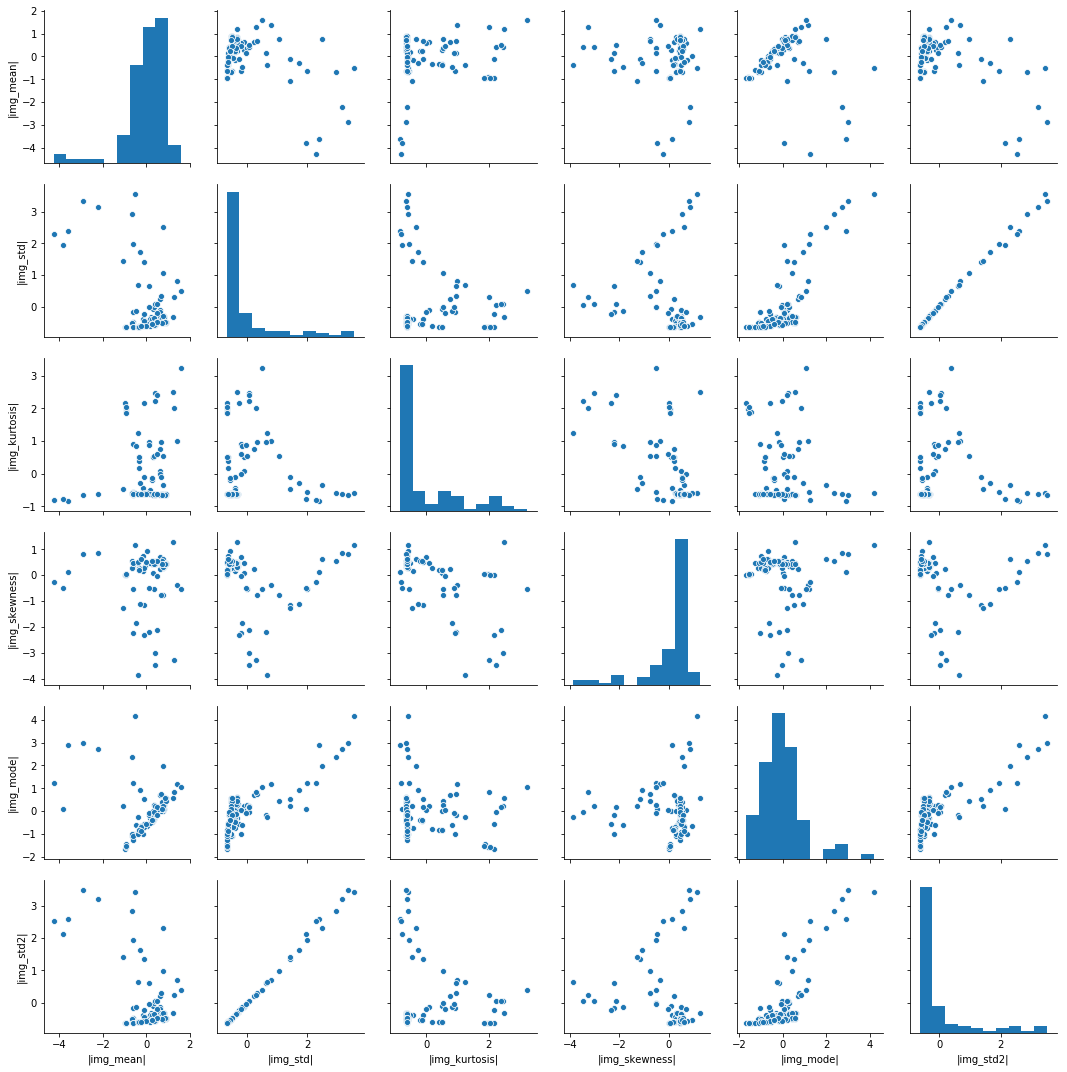

In [280]:
stat_normnames = imgutils.normalized_names(stat_names)

%matplotlib inline
sb.pairplot(df2, vars=stat_normnames)
plt.show()

In [37]:
#label them based on std (first experiment)
df2['class'] = df.apply(lambda r: assign_label(r['|img_std|']), axis=1)

In [38]:
df2.to_csv('../data/Crystals_Apr_12/Tileset7-2.csv', sep=';')

# Update October 30 - Improved visualization (for report)

In [223]:
# Re-run this cell if you altered imgutils or imgutils_test
import importlib
importlib.reload(imgutils)

<module 'imgutils' from 'C:\\JADS\\SW\\Grad Proj\\sources\\imgutils.py'>

In [145]:
imgfiles = df_imgfiles['filename'].tolist()

<IPython.core.display.Javascript object>


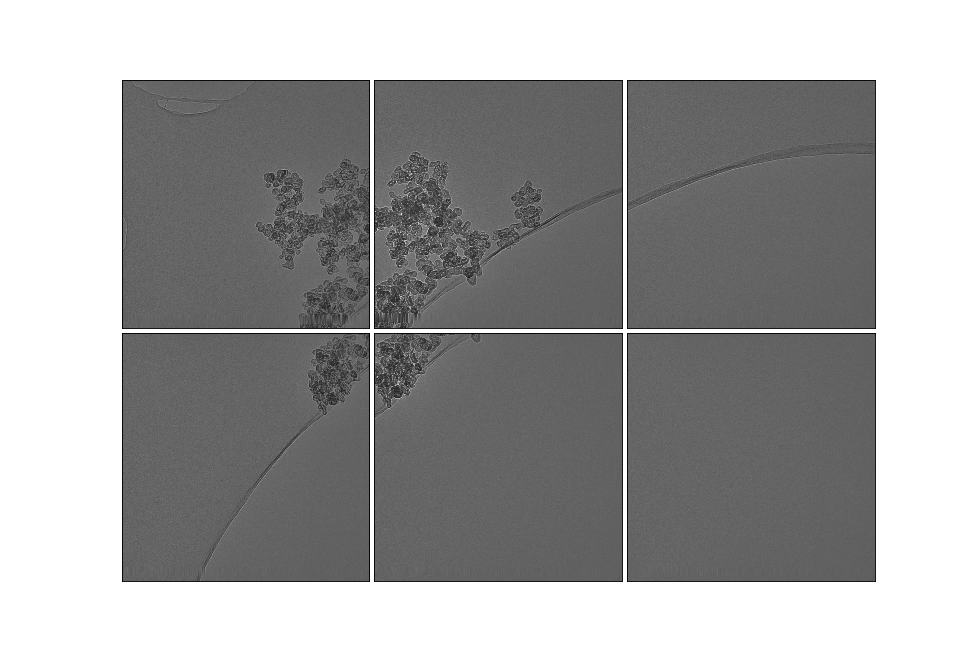

In [276]:
# this is a set of 2 x 3 images covering a larger area (a so called 'tile set')
imgutils.showimgset(imgfiles, 2,3, fig_size=(12, 8), relspacing=(0.02,0.02))

<IPython.core.display.Javascript object>


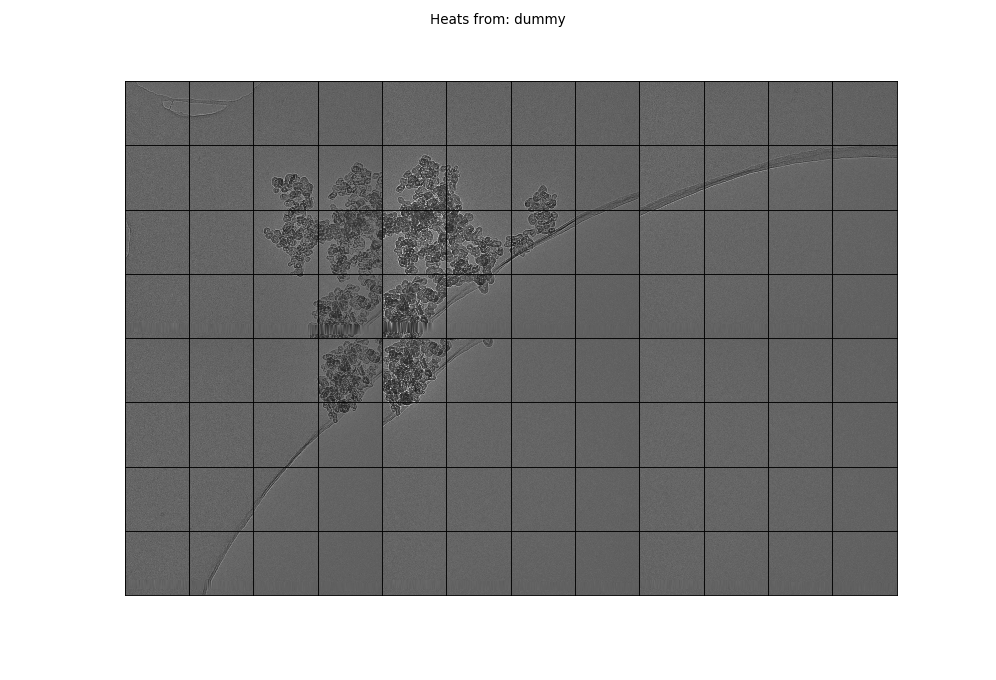

In [271]:
imgutils.show_large_heatmap(df, 'dummy', imgfiles, 2, 3, opacity=0.8, cmapname='summer', no_borders=False, fig_size=(12,8.2))

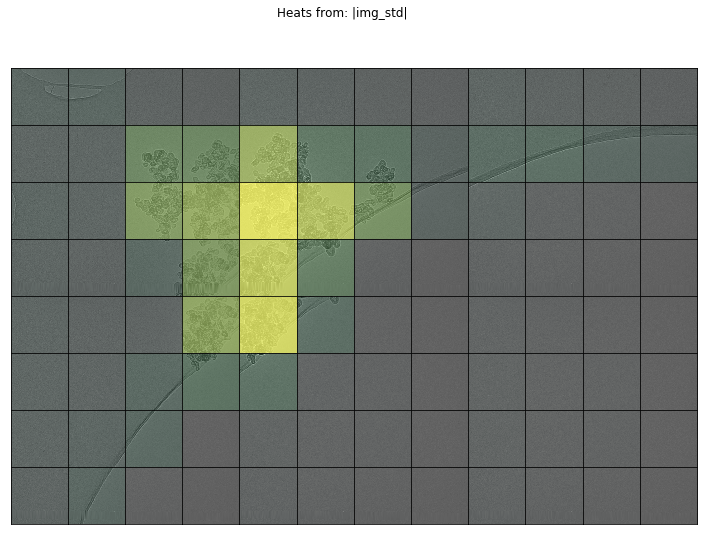

In [253]:
imgutils.show_large_heatmap(df, '|img_std|', imgfiles, 2, 3, opacity=0.8, cmapname='summer', no_borders=False, heatdependent_opacity=True, fig_size=(12,8.2))

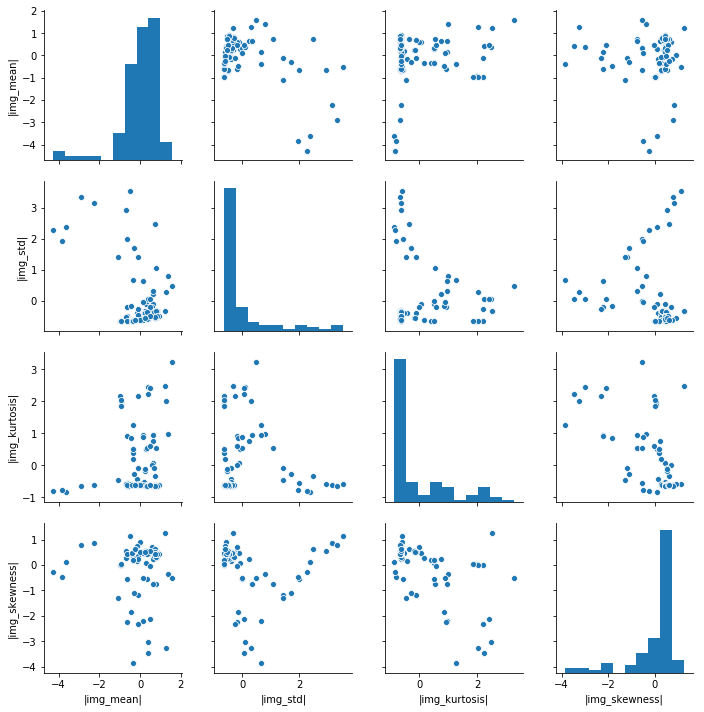

In [283]:
%matplotlib inline
sb.pairplot(df2, vars=stat_normnames[:-2])
plt.show()